In [38]:
from sklearn import datasets
import figurefirst as fifi
from IPython.display import display,SVG
%pylab inline

Populating the interactive namespace from numpy and matplotlib


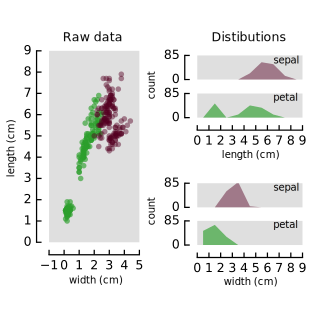

In [75]:
from sklearn import datasets
import numpy as np
import figurefirst as fifi
d = datasets.load_iris()
data = dict()
for n,v in zip(d.feature_names,d.data.T):
    data[tuple(n.split()[:2][::-1])] = v
layout = fifi.FigureLayout('example_layout.svg')
layout.make_mplfigures()
kwa = layout.pathspecs['petal'].mplkwargs()
layout.axes['raw'].scatter(data['width','petal'],
                           data['length','petal'],
                           **kwa)
kwa = layout.pathspecs['sepal'].mplkwargs()
layout.axes['raw'].scatter(data['width','sepal'],
                           data['length','sepal'],
                           **kwa)
bins = arange(0,11)
for key,value in data.items():
    kwa = layout.pathspecs[key[1]].mplkwargs()
    counts,b = np.histogram(value,bins)
    layout.axes[key].fill_between(
                    b[:-1]+0.5,0,counts,**kwa)
layout.apply_mpl_methods()
fifi.mpl_functions.set_spines(layout)
layout.save('example.svg')
close('all')

from IPython.display import display,SVG
display(SVG('example.svg'))

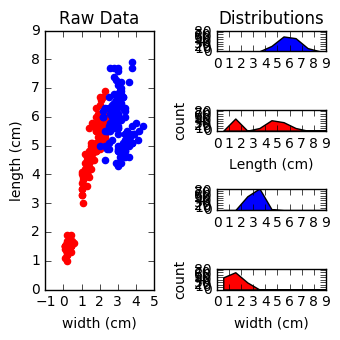

In [76]:
figure(figsize = (3.5,3.5))
ax1 = subplot2grid((4, 2), (0, 0),rowspan = 4)
ax2 = subplot2grid((4, 2), (0, 1))
ax3 = subplot2grid((4, 2), (1, 1))
ax4 = subplot2grid((4, 2), (2, 1))
ax5 = subplot2grid((4, 2), (3, 1))
ax1.scatter(data['width','petal'],
            data['length','petal'],
            color = 'r')
ax1.scatter(data['width','sepal'],
            data['length','sepal'],
            color = 'b')
ax1.set_ylabel('length (cm)')
ax1.set_xlabel('width (cm)')
bins = arange(0,11)
counts,b = histogram(data['length','sepal'],bins)
ax2.fill_between(bins[:-1]+0.5,0,counts)
counts,b = histogram(data['length','petal'],bins)
ax3.fill_between(bins[:-1]+0.5,0,counts,facecolor = 'r')
ax3.set_ylabel('count')
ax3.set_xlabel('Length (cm)')
counts,b = histogram(data['width','sepal'],bins)
ax4.fill_between(bins[:-1]+0.5,0,counts)
counts,b = histogram(data['width','petal'],bins)
ax5.fill_between(bins[:-1]+0.5,0,counts,facecolor = 'r')
ax5.set_ylabel('count')
ax5.set_xlabel('width (cm)')
for ax in [ax2,ax3,ax4,ax5]:
    ax.set_ybound(0,85)
    ax.set_xbound(0,9)
ax1.set_title('Raw Data')
ax2.set_title('Distributions')
tight_layout()
savefig('gridspec.svg')